In [2]:
import pandas as pd

## Exercício
Bora praticar! Para isso utilizaremos o dataset 'Forbes Highest Paid Athletes 1990-2020' que contém uma lista completa dos atletas mais bem pagos do mundo desde a primeira lista publicada pela Forbes em 1990. Em 2002 o período de relatório do ano civil foi alterado para de junho a junho e, consequentemente, não há registros de 2001. 

Importe a tabela **Forbes_Richest_Atheletes_1990_2020** que está em csv dentro do diretório **data**

In [3]:
df_rich = pd.read_csv('./data/Forbes_Richest_Atheletes_1990_2020.csv')
df_rich.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


Verifique com a função .info os campos presentes na tabela

In [4]:
df_rich.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


Imprima as estatísticas padrões do dataframe com a função .describe

In [5]:
df_rich.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


### Gráficos

1) Existem outliers nos valores de ganhos dos atletas

<AxesSubplot:>

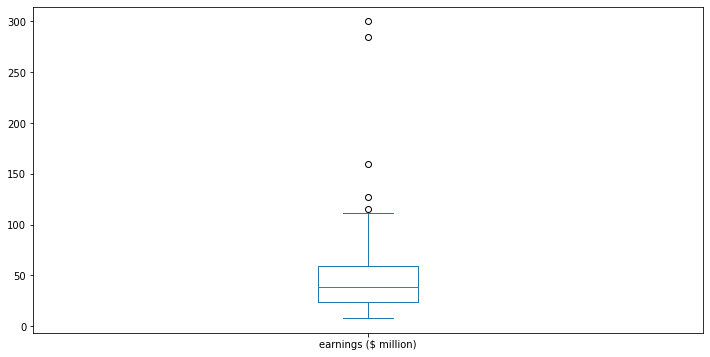

In [6]:
df_rich['earnings ($ million)'].plot(kind='box', figsize=(12,6))

In [7]:
#Função para identificar outliers
def outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR
    df_new = dataframe.loc[(dataframe[column] < lower_boundary) | (dataframe[column] > upper_boundary)]
    return df_new

In [8]:
outliers(df_rich, 'earnings ($ million)')

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
171,172,Tiger Woods,USA,1,1,golf,2008,115.0
241,242,Floyd Mayweather,USA,1,1,Boxing,2015,300.0
242,243,Manny Pacquiao,Philippines,2,11,Boxing,2015,160.0
271,272,Floyd Mayweather,USA,1,>100,Boxing,2018,285.0
281,282,Lionel Messi,Argentina,1,2,Soccer,2019,127.0


2) Faça um gráfico de linha para verificar os ganhos (earnings) anuais dos atletas

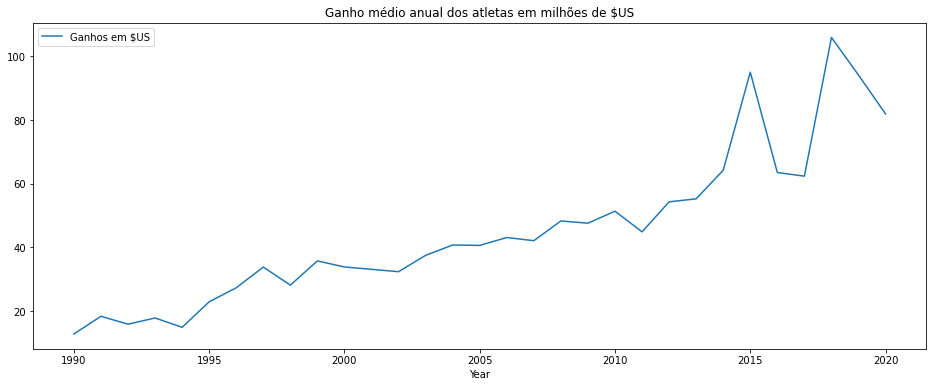

In [9]:
df_year_mean = df_rich.pivot_table(index='Year', values='earnings ($ million)', aggfunc='mean')
ax = df_year_mean.plot(kind='line', figsize=(16,6), title='Ganho médio anual dos atletas em milhões de $US')
ax.legend(['Ganhos em $US'])

<AxesSubplot:xlabel='Year'>

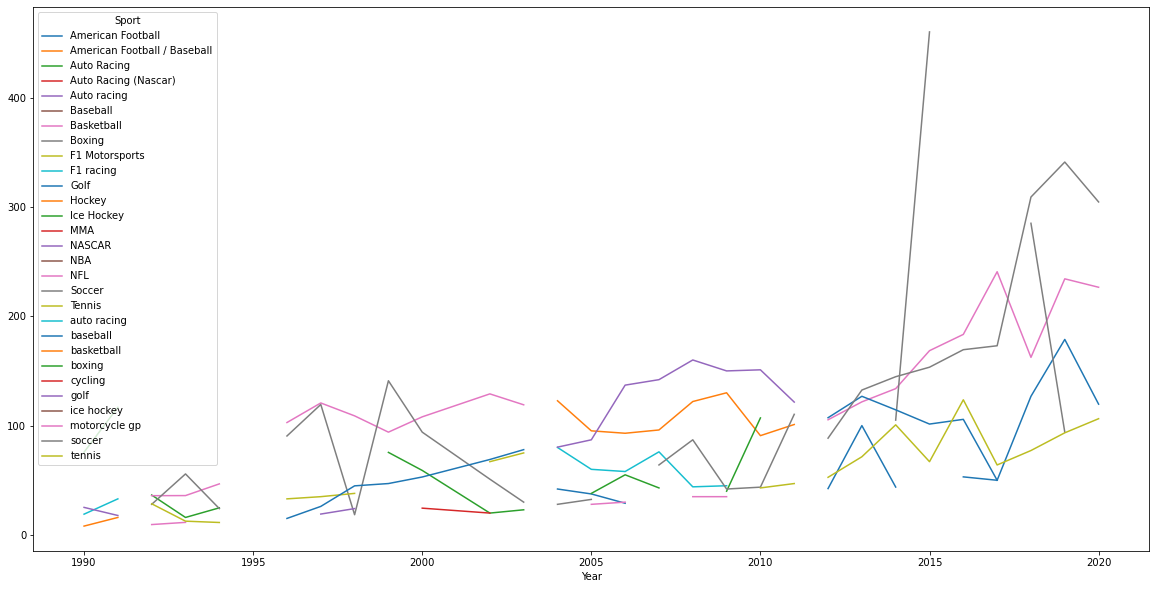

In [20]:
esportes = list(df_rich['Sport'].unique())
df_sports_sum = df_rich.pivot_table(index='Year', columns='Sport', values='earnings ($ million)', aggfunc='sum')
df_sports_sum.plot(figsize=(20,10))

3) Quais são os dois atletas que mais aparecem nos registros do dataframe? Para estes atletas, como está a distribuição anual dos ganhos

In [21]:
df_rich['Name'].value_counts()

Tiger Woods           19
Michael Jordan        19
Kobe Bryant           14
LeBron James          13
Michael Schumacher    13
                      ..
Tom Brady              1
Michael Moorer         1
Dale Earnhardt Jr.     1
Greg Norman            1
Carson Wentz           1
Name: Name, Length: 82, dtype: int64

Tiger Woods e Michael Jordan são os dois atletas que mais aparecem no DF

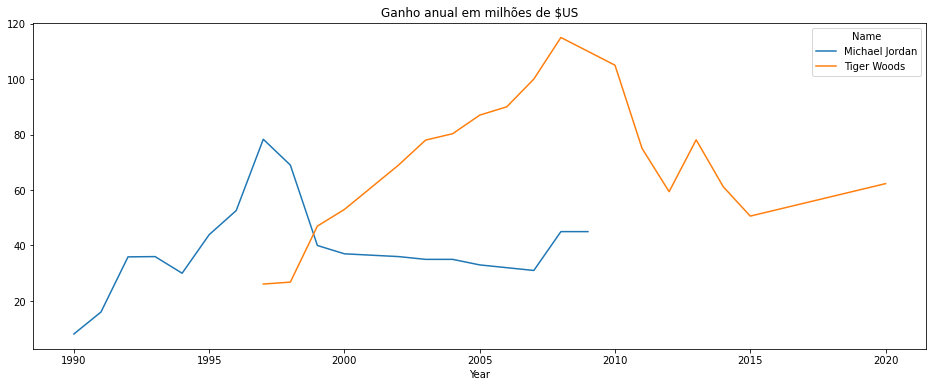

In [35]:
df_rich['Name'].value_counts()
lista_top_2 = list(df_rich['Name'].value_counts().index)[0:2]
df_top2 = df_rich[df_rich['Name'].isin(lista_top_2)]
ax = df_top2.pivot_table(index='Year', columns='Name', values='earnings ($ million)').plot(figsize=(16,6), title='Ganho anual em milhões de US$')

4) Construa um gráfico de **barras horizontais** com os top 15 atletas em **média** de ganhos

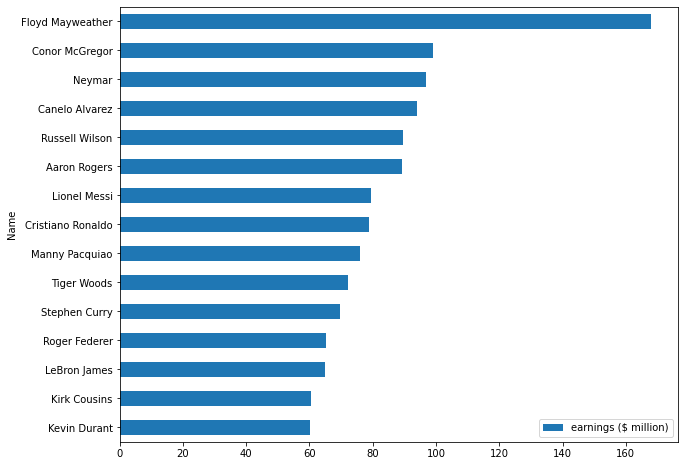

In [48]:
df_name_mean_top15 = df_rich.pivot_table(index='Name', values='earnings ($ million)', aggfunc='mean').nlargest(15, columns='earnings ($ million)')
df_name_mean_top15.plot(kind='barh', figsize=(10,8)).invert_yaxis()

5) Gráfico de pizza as contagens dos países

<AxesSubplot:ylabel='Nationality'>

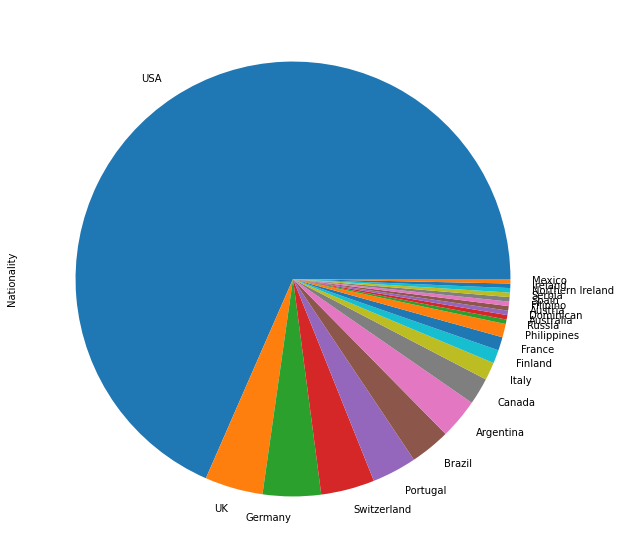

In [61]:
df_rich['Nationality'].value_counts().plot(kind='pie', figsize=(10,10))

6) Dado o gráfico produzido acima construa um gráfico apenas com os países que obtiveram maior quantidade de atletas representados (USA, UK, Germany, Switzerland, Portugal) dos ganhos acumulados por país em função do tempo. Utilize um gráfico de linhas.

<AxesSubplot:xlabel='Year'>

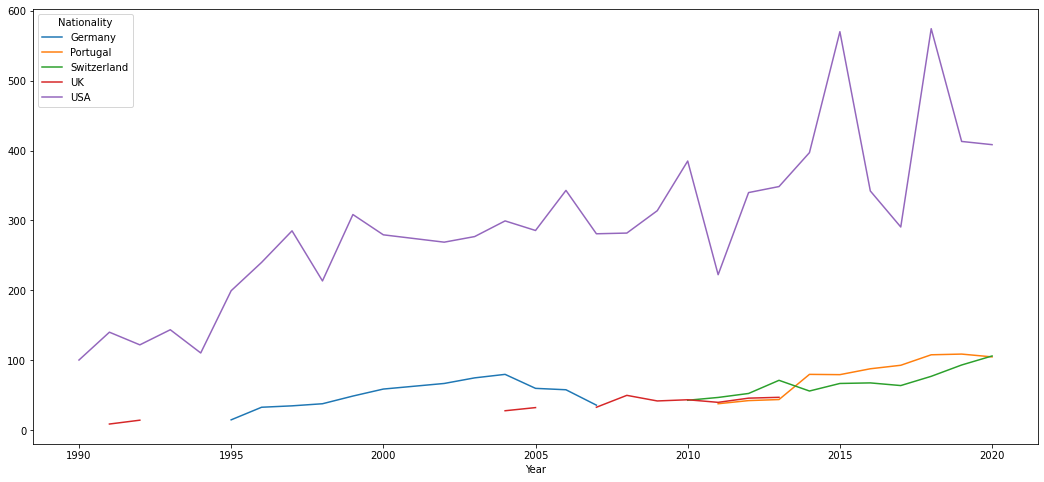

In [73]:
lista_nacionalidade_top5 = df_rich['Nationality'].value_counts()[0:5].index
df_rich[df_rich['Nationality'].isin(lista_nacionalidade_top5)].pivot_table(index='Year', values='earnings ($ million)', columns='Nationality', aggfunc='sum').plot(figsize=(18,8))

7) Faça um gráfico de pizza para verificar qual esporte mais aparece nestas listas

<AxesSubplot:ylabel='Sport'>

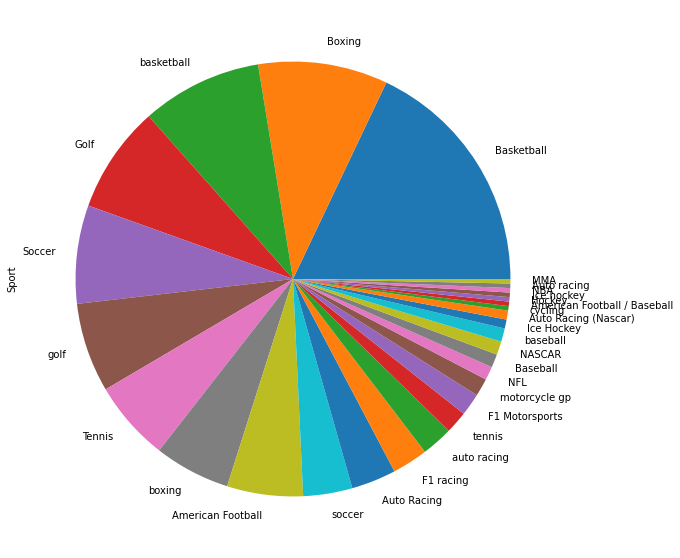

In [74]:
df_rich['Sport'].value_counts().plot(kind='pie', figsize=(10,10))

<AxesSubplot:xlabel='Sport'>

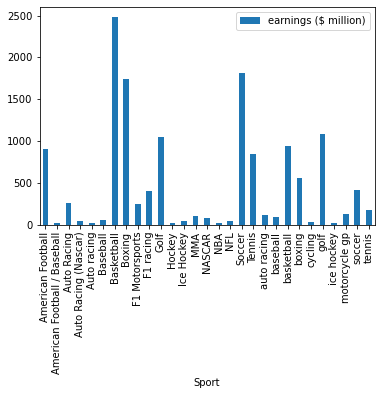

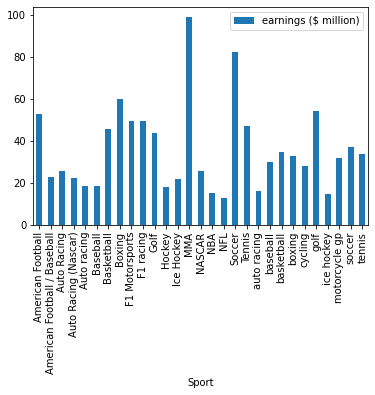

In [79]:
df_rich.pivot_table(index='Sport', values='earnings ($ million)', aggfunc='sum').plot(kind='bar')
df_rich.pivot_table(index='Sport', values='earnings ($ million)', aggfunc='mean').plot(kind='bar')